In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/fraudTrain.csv')
test= pd.read_csv('/content/fraudTest.csv')

In [ ]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46718 entries, 0 to 46717
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             46718 non-null  int64  
 1   trans_date_trans_time  46717 non-null  object 
 2   cc_num                 46717 non-null  float64
 3   merchant               46717 non-null  object 
 4   category               46717 non-null  object 
 5   amt                    46717 non-null  float64
 6   first                  46717 non-null  object 
 7   last                   46717 non-null  object 
 8   gender                 46717 non-null  object 
 9   street                 46717 non-null  object 
 10  city                   46717 non-null  object 
 11  state                  46717 non-null  object 
 12  zip                    46717 non-null  float64
 13  lat                    46717 non-null  float64
 14  long                   46717 non-null  float64
 15  ci

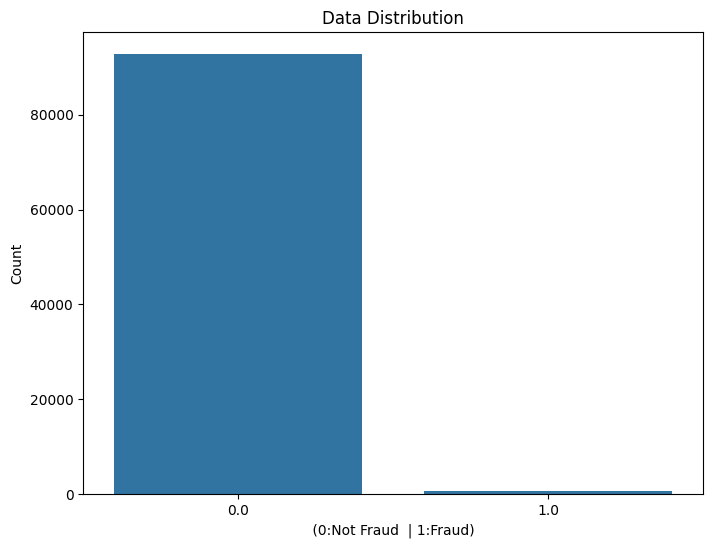

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=pd.concat([train, test], ignore_index=True))
plt.title('Data Distribution')
plt.xlabel(' (0:Not Fraud  | 1:Fraud) ')
plt.ylabel('Count')
plt.show()


In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [ ]:
train.isnull().sum(),test.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [ ]:
train['lat_dist'] = abs(round(train['merch_lat']-train['lat'],2))
train['long_dist'] = abs(round(train['merch_long']-train['long'],2))
test['lat_dist'] = abs(round(test['merch_lat']-test['lat'],2))
test['long_dist'] = abs(round(test['merch_long']-test['long'],2))

In [ ]:
cols_to_drop = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state']
train.drop(columns=cols_to_drop,inplace = True)
test.drop(columns=cols_to_drop,inplace = True)

In [ ]:
print(train.shape)
print(test.shape)

(643302, 7)
(555719, 7)


In [ ]:
train.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,F,28654.0,3495.0,0.0,0.07,0.87
1,107.23,F,99160.0,149.0,0.0,0.27,0.02
2,220.11,M,83252.0,4154.0,0.0,0.97,0.11
3,45.00,M,59632.0,1939.0,0.0,0.80,0.45
4,41.96,M,24433.0,99.0,0.0,0.25,0.83


In [ ]:
train.gender =[ 1 if value == "M" else 0 for value in train.gender]
test.gender =[ 1 if value == "M" else 0 for value in test.gender]

In [ ]:
train.head()

,amt,gender,zip,city_pop,is_fraud,lat_dist,long_dist
0,4.97,0,28654.0,3495.0,0.0,0.07,0.87
1,107.23,0,99160.0,149.0,0.0,0.27,0.02
2,220.11,1,83252.0,4154.0,0.0,0.97,0.11
3,45.00,1,59632.0,1939.0,0.0,0.80,0.45
4,41.96,1,24433.0,99.0,0.0,0.25,0.83


In [ ]:
X_train = train.drop('is_fraud',axis=1)
X_test = test.drop('is_fraud',axis=1)
y_train = train['is_fraud']
y_test = test['is_fraud']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 45)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
